## Working with the TensorFlow Functional API

In [1]:
import tensorflow as tf
tf.__version__

'2.13.0'

In [2]:
# Importing the Dataset
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X_train_full, y_train_full = housing.data, housing.target

In [3]:
# Creating the Validation Set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train)

print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
print("X valid: ", X_valid.shape)
print("y valid: ", y_valid.shape)
print("X test: ", X_test.shape)
print("y test: ", y_test.shape)

X train:  (11610, 8)
y train:  (11610,)
X valid:  (3870, 8)
y valid:  (3870,)
X test:  (5160, 8)
y test:  (5160,)


## Wide and Deep Neural Network

In [4]:
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

**Configuring the Layers used by the Model**

In [5]:
# Normalisation Layer to parse all the inputs
norm_layer = tf.keras.layers.Normalization()

# Hidden Layers
hidden_layer_1 = tf.keras.layers.Dense(50, activation="relu")
hidden_layer_2 = tf.keras.layers.Dense(50, activation="relu")
hidden_layer_3 = tf.keras.layers.Dense(20, activation="relu")

# Concatenation Layer
concat_layer = tf.keras.layers.Concatenate()

# Output Layer
output_layer = tf.keras.layers.Dense(1)

**Constructing the Model**

In [6]:
# Input Layer
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])

# Chaining the Rest of the Model
norm = norm_layer(input_)
hidden1 = hidden_layer_1(norm)
hidden2 = hidden_layer_2(hidden1)
hidden3 = hidden_layer_3(hidden2)

# Concatenating the Input and Chained Layers
concat = concat_layer([norm, hidden3])

# Output Layer
output = output_layer(concat)

# Creating an instance of the Model
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 50)                   450       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 50)                   2550      ['dense[0][0]']           

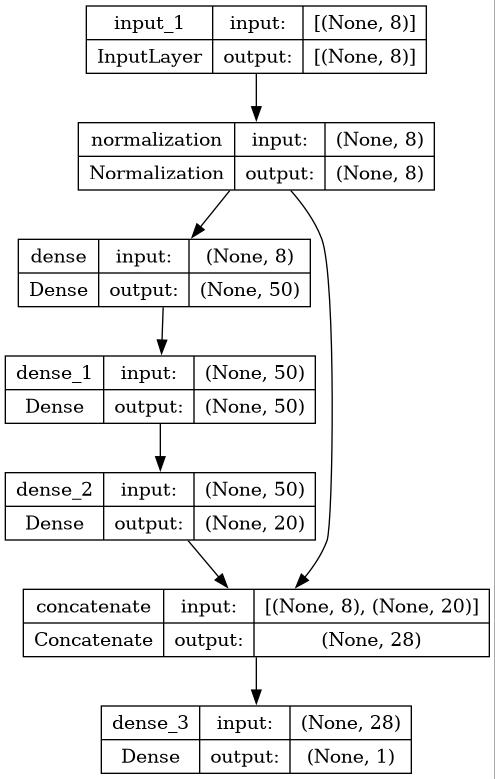

In [8]:
# Visualising the Model
tf.keras.utils.plot_model(model, "functional_model.jpg", show_shapes=True, show_layer_names=True)

**Inference**
- While Constructing the model using Keras it is assumed that the Chaining of the layers has been done.
- The chaining of the layers is necessary for the model to work when built using the Functional API

**Compiling the Model**

In [9]:
model.compile(
    loss="mse", 
    metrics=["RootMeanSquaredError"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
)

In [10]:
# Scaling the Features from the Input Layer
norm_layer.adapt(X_train)

**Training**

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30)

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 1.1137 - root_mean_squared_error: 1.0553 - val_loss: 0.4736 - val_root_mean_squared_error: 0.6882
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4252 - root_mean_squared_error: 0.6521 - val_loss: 0.3803 - val_root_mean_squared_error: 0.6167
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3884 - root_mean_squared_error: 0.6232 - val_loss: 0.3651 - val_root_mean_squared_error: 0.6042
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3636 - root_mean_squared_error: 0.6030 - val_loss: 0.3564 - val_root_mean_squared_error: 0.5970
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3600 - root_mean_squared_error: 0.6000 - val_loss: 0.3438 - val_root_mean_squared_error: 0.5863
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3473 - root_mean_squared_error: 0.5893 - val_loss: 0.3387 - val_

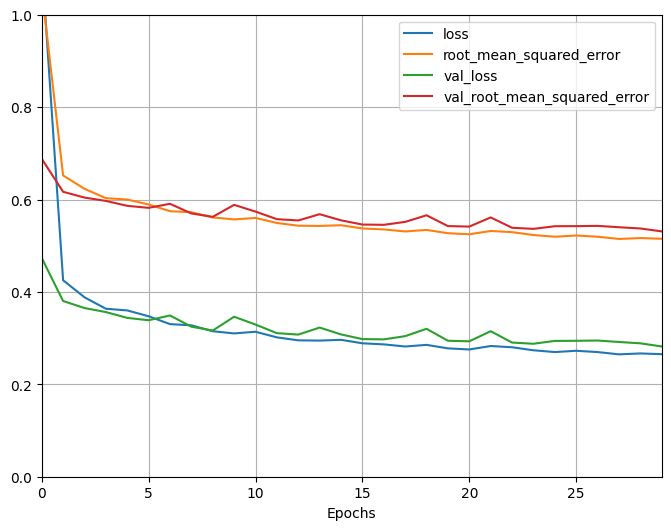

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(
    figsize=(8, 6),
    xlim=[0, 29], ylim=[0, 1],
    xlabel="Epochs"
)

plt.grid()
plt.show()

**Testing**

In [13]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2857 - root_mean_squared_error: 0.5345


[0.2856939733028412, 0.5345034599304199]

**Making Predictions**

In [14]:
X_pred = X_test[-5:]
y_pred = model.predict(X_pred)

print("Predictions:\n", y_pred)
print("\nTargets:\n", y_test[-5:])

1/1 [==============================] - 0s 118ms/step
Predictions:
 [[3.8347747 ]
 [2.7439907 ]
 [0.81666106]
 [2.214903  ]
 [3.7622643 ]]

Targets:
 [5.00001 2.696   0.675   4.471   3.294  ]


## Wide and Deep Model with Multiple Inputs

- With the Functional API we can pass a feature or a group features through different parts / inputs of the model

In [15]:
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

**Configuring the Layers used by the Model**

In [16]:
# Splitting the Inputs
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

# Normalisation Layers
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

# Chaining the Inputs
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

# Hidden Layers
hidden1 = tf.keras.layers.Dense(50, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(50, activation="relu")(hidden1)

# Concatenation Layer
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

# Output Layer
output = tf.keras.layers.Dense(1)(concat)

**Constructing the Model**

In [17]:
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 normalization_1 (Normaliza  (None, 6)                    13        ['input_2[0][0]']             
 tion)                                                                                            
                                                                                                  
 input_1 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 50)                   350       ['normalization_1[0][0]'] 

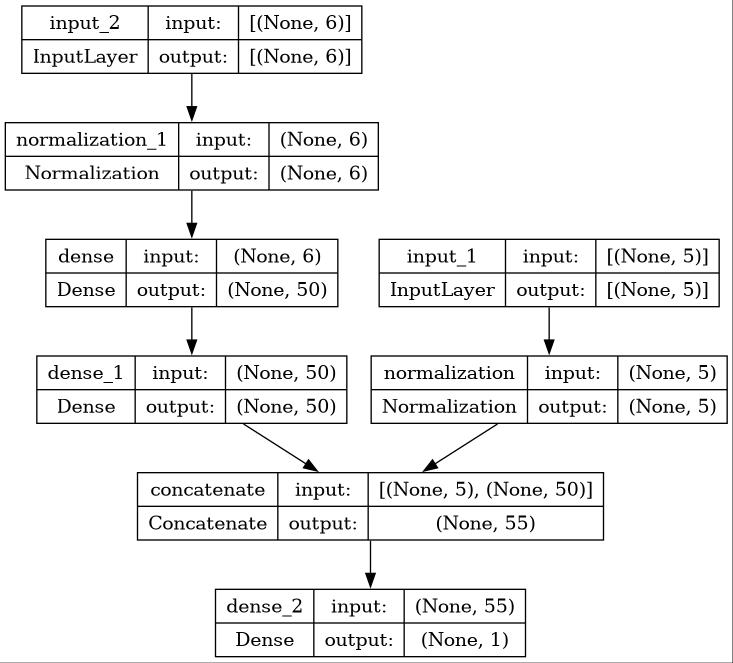

In [18]:
tf.keras.utils.plot_model(model, "sep_inputs_wide_and_deep.jpg", show_shapes=True, show_layer_names=True)

In [19]:
# Splitting the Inputs to Train and Test the Model
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_pred_wide, X_pred_deep = X_test_wide[-5:], X_test_deep[-5:]

**Compiling the Model**

In [20]:
model.compile(
    loss="mse",
    metrics=["RootMeanSquaredError"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
)

**Training**

**Important**
- Since the model is taking multiple inputs we need to pass the Training set in order for the multiple inputs

In [21]:
history = model.fit(
    (X_train_wide, X_train_deep), y_train,
    validation_data=((X_valid_wide, X_valid_deep), y_valid),
    epochs=30
)

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 126.6198 - root_mean_squared_error: 11.2525 - val_loss: 5.1335 - val_root_mean_squared_error: 2.2657
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 5.0207 - root_mean_squared_error: 2.2407 - val_loss: 3.4262 - val_root_mean_squared_error: 1.8510
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 3.0319 - root_mean_squared_error: 1.7412 - val_loss: 3.2878 - val_root_mean_squared_error: 1.8132
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 3.9293 - root_mean_squared_error: 1.9822 - val_loss: 2.3266 - val_root_mean_squared_error: 1.5253
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 4.6094 - root_mean_squared_error: 2.1470 - val_loss: 1.2772 - val_root_mean_squared_error: 1.1301
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 1.7201 - root_mean_squared_error: 1.3115 - val_loss: 1.1669 - v

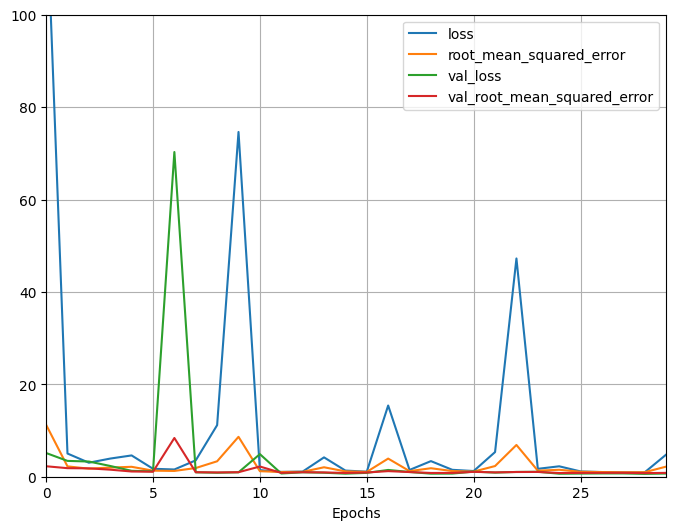

In [22]:
pd.DataFrame(history.history).plot(
    figsize=(8, 6),
    xlim=[0, 29],
    ylim=[0, 100],
    xlabel="Epochs"
)

plt.grid()
plt.show()

**Testing**

In [23]:
model.evaluate((X_test_wide, X_test_deep), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.7133 - root_mean_squared_error: 0.8445


[0.7132518291473389, 0.844542384147644]

**Making Predictions**

In [24]:
y_pred = model.predict((X_pred_wide, X_pred_deep))

print("Predictions:\n", y_pred)
print("\nTargets:\n", y_test[-5:])

1/1 [==============================] - 0s 80ms/step
Predictions:
 [[3.536731 ]
 [2.6205266]
 [1.4438157]
 [3.1716135]
 [3.5299914]]

Targets:
 [5.00001 2.696   0.675   4.471   3.294  ]


## Wide and Deep Model with Multiple Outputs

In [25]:
tf.keras.backend.clear_session()
tf.random.set_seed(1730)

**Configuring the Layers of the Model**

In [26]:
# Input Layers
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])

# Normalisation Layers
norm_wide_layer = tf.keras.layers.Normalization()
norm_deep_layer = tf.keras.layers.Normalization()

# Chaining the Input Layers
norm_wide = norm_wide_layer(input_wide)
norm_deep = norm_deep_layer(input_deep)

# Hidden Layers
hidden1 = tf.keras.layers.Dense(50, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(50, activation="relu")(hidden1)

# Concatenation Layer
concat = tf.keras.layers.concatenate([norm_wide, hidden2])

# Aux Output
aux_out = tf.keras.layers.Dense(1)(hidden2)

# Output Layer
output = tf.keras.layers.Dense(1)(concat)

**Constructing the Model**

In [27]:
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_out])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 normalization_1 (Normaliza  (None, 6)                    13        ['input_2[0][0]']             
 tion)                                                                                            
                                                                                                  
 input_1 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 50)                   350       ['normalization_1[0][0]'] 

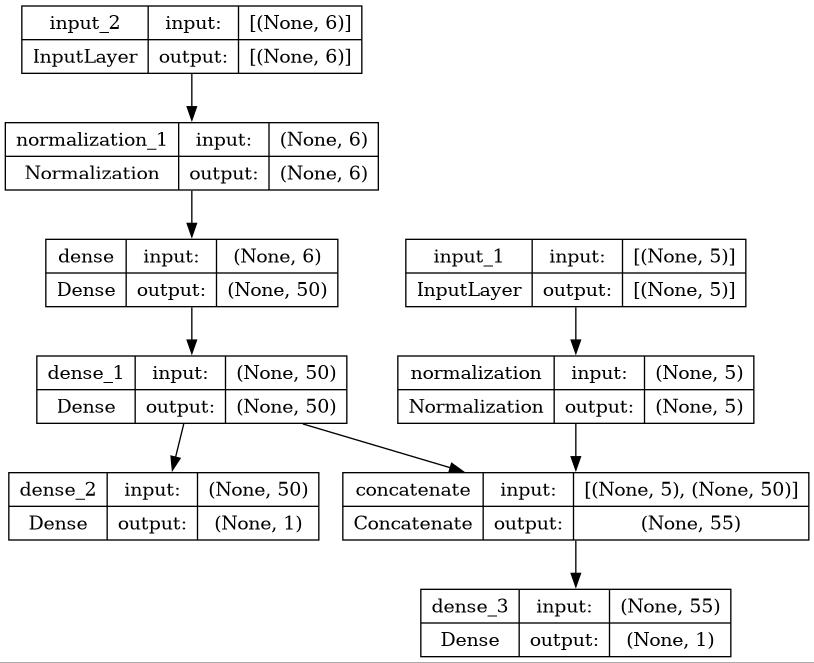

In [28]:
tf.keras.utils.plot_model(model, "sep_outputs_wide_and_deep.jpg", show_shapes=True, show_layer_names=True)

**Compiling the Model**

**Important**
- When compiling a model with multiple outputs we need to pass a **`list of loss function`** in order of the outputs to get accurate loss calculations
- If a single loss function is passed it is used to evaluate all the outputs of the model
- **`Loss_Weights`** parameter is used to assign a weight to the losses calculated incase of multiple output models

In [29]:
model.compile(
    loss=("mse", "mse"),
    loss_weights=[0.9, 0.1],
    metrics=["RootMeanSquaredError"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
)

norm_wide_layer.adapt(X_train_wide)
norm_deep_layer.adapt(X_train_deep)

**Training**

**Important**
- When training and test multiple output model we need to pass the **`target array`** to each output seperately for effective loss calculation

In [30]:
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train),
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    epochs=30
)

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 1.3038 - dense_3_loss: 1.2411 - dense_2_loss: 1.8686 - dense_3_root_mean_squared_error: 1.1140 - dense_2_root_mean_squared_error: 1.3669 - val_loss: 0.6637 - val_dense_3_loss: 0.6403 - val_dense_2_loss: 0.8742 - val_dense_3_root_mean_squared_error: 0.8002 - val_dense_2_root_mean_squared_error: 0.9350
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5444 - dense_3_loss: 0.5257 - dense_2_loss: 0.7122 - dense_3_root_mean_squared_error: 0.7251 - dense_2_root_mean_squared_error: 0.8439 - val_loss: 0.4854 - val_dense_3_loss: 0.4715 - val_dense_2_loss: 0.6110 - val_dense_3_root_mean_squared_error: 0.6866 - val_dense_2_root_mean_squared_error: 0.7817
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4628 - dense_3_loss: 0.4523 - dense_2_loss: 0.5566 - dense_3_root_mean_squared_error: 0.6726 - dense_2_root_mean_squared_error: 0.7461 - val_loss: 0.4237 - val_dense_3_loss

**Testing**

In [31]:
model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

162/162 [==============================] - 0s 2ms/step - loss: 0.3277 - dense_3_loss: 0.3223 - dense_2_loss: 0.3769 - dense_3_root_mean_squared_error: 0.5677 - dense_2_root_mean_squared_error: 0.6139


[0.327725887298584,
 0.3222622573375702,
 0.37689945101737976,
 0.5676814913749695,
 0.6139213442802429]

In [32]:
y_pred_main, y_pred_aux = model.predict((X_pred_wide, X_pred_deep))

print("Predictions:\n", y_pred_main)
print("\nTarget:\n", y_test[-5:])

1/1 [==============================] - 0s 86ms/step
Predictions:
 [[3.5348554]
 [2.7535818]
 [0.7854888]
 [2.638151 ]
 [3.396076 ]]

Target:
 [5.00001 2.696   0.675   4.471   3.294  ]


**Inference**
- In the above model we have used the Auxilary Output for the purpose of Regularization.
- Regularization puts constraints on the model ensuring it will not overfit its weights.
- The predictions made by this model is much closer to the original value in comparison to all the other models

## TensorFlow Model Subclassing API for Dynamic Models

**Important**
- All the models built above using the `Sequential API` and `Functional API` are static models.
- They can be saved, cloned and shared.
- Their structure can be analysed even before any data has propagated through the network.
- **`The models are hence a Static Graph of Layers`**


- By using the **`Model Subclassing API`** we can build dynamic models which can support programming language logic.
- They can involve loops, conditions, branching and other dynamic behaviour.
- `Drawback:` A model built using the Subclassing API is hidden within the `Call()`.
    - It cannot be saved, stored and analysed using the Keras methods

**Constructing the Model**

In [33]:
class WindAndDeepWithMultipleOuputs(tf.keras.Model):
    
    # Constructor of the Class
    def __init__(self, units=30, activation="relu", **kwargs):
        
        # Needed for supporting naming the model
        super().__init__(**kwargs)
        
        # Normalisation Layers
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        
        # Hidden Layers
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        
        # Main output layer
        self.main_output = tf.keras.layers.Dense(1)
        
        # Auxilary Output
        self.aux_output = tf.keras.layers.Dense(1)
    
    # The computation performed using this model follow the architecture created in the Call()
    def call(self, inputs):
        
        # Seperating the Inputs
        input_wide, input_deep = inputs
        
        # Chaining the Model
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        
        # Hidden Layers
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        
        # Concatenation Layer
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        
        # Aux Output
        aux_out = self.aux_output(hidden2)
        
        # Main Output
        output = self.main_output(concat)
        
        return output, aux_out

In [34]:
tf.random.set_seed(1730)
tf.keras.backend.clear_session()

**Initialising the Model**

In [35]:
model = WindAndDeepWithMultipleOuputs(30, activation="relu", name="my_cool_class_model")

**Compiling the Model**

In [36]:
model.compile(
    loss=("mse", "mse"),
    loss_weights=[0.9, 0.1],
    metrics=["RootMeanSquaredError"],
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
)

In [37]:
# Normalisation of the Data
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)

**Training**

In [38]:
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train),
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    epochs=30
)

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 1.2894 - output_1_loss: 1.2020 - output_2_loss: 2.0760 - output_1_root_mean_squared_error: 1.0964 - output_2_root_mean_squared_error: 1.4408 - val_loss: 0.6379 - val_output_1_loss: 0.5944 - val_output_2_loss: 1.0296 - val_output_1_root_mean_squared_error: 0.7710 - val_output_2_root_mean_squared_error: 1.0147
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5554 - output_1_loss: 0.5170 - output_2_loss: 0.9009 - output_1_root_mean_squared_error: 0.7190 - output_2_root_mean_squared_error: 0.9492 - val_loss: 0.4848 - val_output_1_loss: 0.4566 - val_output_2_loss: 0.7384 - val_output_1_root_mean_squared_error: 0.6757 - val_output_2_root_mean_squared_error: 0.8593
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4767 - output_1_loss: 0.4536 - output_2_loss: 0.6848 - output_1_root_mean_squared_error: 0.6735 - output_2_root_mean_squared_error: 0.8275 - val_loss: 0.441

In [39]:
model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))

162/162 [==============================] - 0s 2ms/step - loss: 0.3441 - output_1_loss: 0.3383 - output_2_loss: 0.3970 - output_1_root_mean_squared_error: 0.5816 - output_2_root_mean_squared_error: 0.6301


[0.34413254261016846,
 0.3382595479488373,
 0.39698922634124756,
 0.5816008448600769,
 0.6300708055496216]

In [40]:
y_pred_main, y_pred_aux = model.predict((X_pred_wide, X_pred_deep))

print("Predictions:\n", y_pred_main)
print("\nTargets:\n", y_test[-5:])

1/1 [==============================] - 0s 90ms/step
Predictions:
 [[3.6486647 ]
 [2.7559137 ]
 [0.79762703]
 [2.5900774 ]
 [3.3051302 ]]

Targets:
 [5.00001 2.696   0.675   4.471   3.294  ]


## Utilising Callbacks

- Callbacks allows Keras to perform additional functionality at the start and end of training
    - At the start and end of each epoch
    - At the start and end of each mini batch

**Important**
- The **`ModelCheckpoint Callback`** regularly makes a copy of the model parameters such as its weights.
- By default the model parameters are saved after each epoch
- When working with a Validation Dataset it is better to use the `save_best_only` parameter to store the model when it performs its best

In [41]:
# Initialising a Callback
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)

# Training the Model with Callbacks
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train),
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    epochs=30, callbacks=[checkpoint_cb]
)

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3167 - output_1_loss: 0.3114 - output_2_loss: 0.3644 - output_1_root_mean_squared_error: 0.5580 - output_2_root_mean_squared_error: 0.6037 - val_loss: 0.3319 - val_output_1_loss: 0.3239 - val_output_2_loss: 0.4039 - val_output_1_root_mean_squared_error: 0.5691 - val_output_2_root_mean_squared_error: 0.6355
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3158 - output_1_loss: 0.3104 - output_2_loss: 0.3638 - output_1_root_mean_squared_error: 0.5572 - output_2_root_mean_squared_error: 0.6031 - val_loss: 0.3341 - val_output_1_loss: 0.3267 - val_output_2_loss: 0.4011 - val_output_1_root_mean_squared_error: 0.5716 - val_output_2_root_mean_squared_error: 0.6333
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3219 - output_1_loss: 0.3167 - output_2_loss: 0.3689 - output_1_root_mean_squared_error: 0.5628 - output_2_root_mean_squared_error: 0.6074 - val_loss: 0.323

**Important**
- The **`EarlyStopping Callback`** will stop the training process once a condition or performance measure it met
- By default it stops if no progress is being made on the Validation Set for a number of epochs.
- This is defined by the `Patience` Parameter

In [42]:
earlystop_cb = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train),
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    epochs=100, callbacks=[earlystop_cb]
)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2949 - output_1_loss: 0.2905 - output_2_loss: 0.3347 - output_1_root_mean_squared_error: 0.5390 - output_2_root_mean_squared_error: 0.5785 - val_loss: 0.3187 - val_output_1_loss: 0.3122 - val_output_2_loss: 0.3774 - val_output_1_root_mean_squared_error: 0.5587 - val_output_2_root_mean_squared_error: 0.6144
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2957 - output_1_loss: 0.2912 - output_2_loss: 0.3359 - output_1_root_mean_squared_error: 0.5397 - output_2_root_mean_squared_error: 0.5796 - val_loss: 0.3175 - val_output_1_loss: 0.3112 - val_output_2_loss: 0.3736 - val_output_1_root_mean_squared_error: 0.5579 - val_output_2_root_mean_squared_error: 0.6112
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.2995 - output_1_loss: 0.2952 - output_2_loss: 0.3386 - output_1_root_mean_squared_error: 0.5433 - output_2_root_mean_squared_error: 0.5819 - val_loss: 0.

**Customised Callbacks**
- Like Model Subclassing API to build dynamic models we inherit the **`keras.callbacks.Callback`** class to create custom callbacks

In [43]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch: {epoch} \t Validation/Train: {ratio:.2f}")
        
ratio_cb = CustomCallback()
        
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train),
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    epochs=20, callbacks=[ratio_cb], verbose=0
)

Epoch: 0 	 Validation/Train: 1.08
Epoch: 1 	 Validation/Train: 1.07
Epoch: 2 	 Validation/Train: 1.03
Epoch: 3 	 Validation/Train: 1.04
Epoch: 4 	 Validation/Train: 1.04
Epoch: 5 	 Validation/Train: 1.07
Epoch: 6 	 Validation/Train: 1.06
Epoch: 7 	 Validation/Train: 1.09
Epoch: 8 	 Validation/Train: 1.06
Epoch: 9 	 Validation/Train: 1.06
Epoch: 10 	 Validation/Train: 1.05
Epoch: 11 	 Validation/Train: 1.06
Epoch: 12 	 Validation/Train: 1.06
Epoch: 13 	 Validation/Train: 1.08
Epoch: 14 	 Validation/Train: 1.05
Epoch: 15 	 Validation/Train: 1.06
Epoch: 16 	 Validation/Train: 1.06
Epoch: 17 	 Validation/Train: 1.12
Epoch: 18 	 Validation/Train: 1.05
Epoch: 19 	 Validation/Train: 1.07


## Hyper Parameter Tuning for Neural Networks

In [44]:
fashion_minst = tf.keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_minst.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.08)

4422102/4422102 [==============================] - 1s 0us/step


In [45]:
print("X train: ", X_train.shape)
print("y train: ", y_train.shape)
print("X valid: ", X_valid.shape)
print("y valid: ", y_valid.shape)
print("X test: ", X_test.shape)
print("y test: ", y_test.shape)

X train:  (55200, 28, 28)
y train:  (55200,)
X valid:  (4800, 28, 28)
y valid:  (4800,)
X test:  (5160, 8)
y test:  (5160,)


In [46]:
import keras_tuner as kt

def build_model(hp):
    
    # Providing all the parameter choices that the model can make while tuning
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=10, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "rmsprop", "adam"])
    
    # Updating the Learning for the Optimizer chosen
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
        
    elif optimizer == "rmsprop":
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
        
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        
    # Building a Simple Model for Tuning
    model = tf.keras.models.Sequential()
    
    # Input Layer
    model.add(tf.keras.layers.Flatten())
    
    # Hidden Layers
    for i in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
        
    # Output Layer
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    
    # Compiling the Model
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    
    return model

In [47]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", overwrite=True, max_trials=5, seed=1730
)

random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 01m 23s]
val_accuracy: 0.7093750238418579

Best val_accuracy So Far: 0.8543750047683716
Total elapsed time: 00h 05m 06s


**Top 3 Models**

In [48]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [49]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
best_params = top3_params[0].values
best_params

{'n_hidden': 5,
 'n_neurons': 73,
 'learning_rate': 0.0027752083061289255,
 'optimizer': 'adam'}

**Training the Best Model**

In [50]:
best_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1725/1725 [==============================] - 6s 3ms/step - loss: 0.4252 - accuracy: 0.8517 - val_loss: 0.4341 - val_accuracy: 0.8492
Epoch 2/10
1725/1725 [==============================] - 5s 3ms/step - loss: 0.4134 - accuracy: 0.8539 - val_loss: 0.4995 - val_accuracy: 0.8321
Epoch 3/10
1725/1725 [==============================] - 5s 3ms/step - loss: 0.4147 - accuracy: 0.8562 - val_loss: 0.4399 - val_accuracy: 0.8429
Epoch 4/10
1725/1725 [==============================] - 5s 3ms/step - loss: 0.4133 - accuracy: 0.8552 - val_loss: 0.4316 - val_accuracy: 0.8492
Epoch 5/10
1725/1725 [==============================] - 5s 3ms/step - loss: 0.4142 - accuracy: 0.8536 - val_loss: 0.4434 - val_accuracy: 0.8417
Epoch 6/10
1725/1725 [==============================] - 5s 3ms/step - loss: 0.3979 - accuracy: 0.8606 - val_loss: 0.3997 - val_accuracy: 0.8562
Epoch 7/10
1725/1725 [==============================] - 5s 3ms/step - loss: 0.4005 - accuracy: 0.8581 - val_loss: 0.4820 - val_accuracy: